In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from pytrends.request import TrendReq
from pprint import pprint
import string

# Import API key
from config import nyt_api_key
from config import gkey

## Generate Top Query List

In [10]:
type_list = ["Arts", 
             "Automobiles", 
             "Blogs", 
             "Books", 
             "Business Day", 
             "Education", 
             "Fashion & Style", 
             "Food", 
             "Health", 
             "Job Market", 
             "Magazine", 
             "membercenter", 
             "Movies", 
             "Multimedia", 
             "N.Y.%20%2F%20Region", 
             "NYT Now", 
             "Obituaries", 
             "Open", 
             "Opinion", 
             "Public Editor", 
             "Real Estate", 
             "Science", 
             "Sports", 
             "Style", 
             "Sunday Review", 
             "T Magazine", 
             "Technology", 
             "The Upshot", 
             "Theater", 
             "Times Insider", 
             "Today’s Paper", 
             "Travel", 
             "U.S.", 
             "World", 
             "Your Money"]

# Initialize empty list to hold description facets
facets = []

# Loop through each type
for type in type_list:
    # Starting URL for NYT Most Shared API Call - Facebook
    url = f"http://api.nytimes.com/svc/mostpopular/v2/mostshared/{type}/facebook/30.json?"
    query_url = f"{url}api-key={nyt_api_key}"
    response = requests.get(query_url).json()
   # pprint(response)

    # Loop through the list of articles, remove common punctuation, and perform a split
    for result in range(len(response['results'])):
        text = response['results'][result]['des_facet']
        for facet in text:
            facets.append(facet.lower())
            print(facets)

['pop and rock music', 'parks and other recreation areas', 'philanthropy', '#metoo movement', 'music', 'kennedy center honors', 'television', 'actors and actresses', 'comedy and humor', 'dancing', 'dancing', 'suits and litigation (civil)', 'sexting', 'cyberharassment', 'opera', '#metoo movement', 'pop and rock music', 'pop and rock music', 'women and girls', '#metoo movement', 'comedy and humor', 'sexual harassment', 'classical music', 'computers and the internet', 'men and boys', 'music', 'gospel music', 'television', 'education (k-12)', 'blacks', 'race and ethnicity', 'discrimination', 'criminal justice', 'television', 'books and literature', 'books and literature', 'books and literature', 'income inequality', 'books and literature', 'writing and writers', 'books and literature', 'palestinians', 'writing and writers', 'books and literature', 'education (k-12)', 'books and literature', 'writing and writers', 'books and literature', 'race and ethnicity', 'books and literature', 'united

In [119]:
# Create DataFrame with the top 5 (by value count) queries
facet_df=pd.DataFrame(facets).rename(columns={0:"Number of Appearances"})
top_queries = pd.DataFrame(facet_df_rnm['Number of Appearances'].value_counts()).head(4)
top_queries_reset =top_queries.reset_index()
top_queries_rnm = top_queries_reset.rename(columns={"index":"Facet"})
top_queries_rnm

,Facet,Number of Appearances
0,united states politics and government,29
1,movies,21
2,books and literature,21
3,theater,19


In [127]:
# Construct keyword list for Google Trends
query_list = top_queries_rnm["Facet"]
kw_list = ["united states politics and government"]
# Configure Google Trends
pytrends = TrendReq(hl='en-US', tz=360)
# Add the keyword list in 
pytrends.build_payload(kw_list, cat=0, timeframe='2017-10-01 2018-09-06', geo='US',gprop='')
    
data_list = pytrends.interest_by_region(resolution='STATE')

data_list1 = data_list.loc[(data_list!=0).any(1)]
data_list1 = data_list1.reset_index()
data_list1['lat'] = ''
data_list1['lng'] = ''
data_list1

,geoName,united states politics and government,lat,lng
0,California,66,,
1,Florida,68,,
2,Georgia,90,,
3,Texas,100,,


In [128]:
data_list1

,geoName,united states politics and government,lat,lng
0,California,66,,
1,Florida,68,,
2,Georgia,90,,
3,Texas,100,,


In [129]:
lat = []
lng = []
for city in data_list1['geoName']:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, gkey)
    geo_data = requests.get(target_url).json()
    lati = geo_data['results'][0]['geometry']['location']['lat']
    lngi = geo_data['results'][0]['geometry']['location']['lng']
    lat.append(lati)
    lng.append(lngi)

In [130]:
data_list1['lat'] = lat
data_list1['lng'] = lng
data_list1.head()

,geoName,united states politics and government,lat,lng
0,California,66,36.778261,-119.417932
1,Florida,68,27.664827,-81.515754
2,Georgia,90,32.165622,-82.900075
3,Texas,100,31.968599,-99.901813


In [131]:
locations = data_list1[['lat','lng']].astype(float)
query_request = data_list1['united states politics and government'].astype(float)

In [132]:
gmaps.configure(api_key = gkey)

In [133]:
# Construct heat map for the query_request
fig = gmaps.figure(map_type="HYBRID")
heat_layer = gmaps.heatmap_layer(locations, weights=query_request,
                                dissipating=False, max_intensity=100, point_radius = 1)
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [134]:
pytrends.related_queries()

{'united states politics and government': {'top':                                       query  value
  0  ap united states government and politics    100, 'rising': None}}

In [136]:
# Construct bar graph for the related queries
related_query = pytrends.related_queries()
related_query_df = related_query['united states politics and government']['rising']
related_query_df

In [137]:
plt.bar(related_query_df['query'],related_query_df['value'],alpha=0.5, align="center")
plt.xticks(rotation=90)

TypeError: 'NoneType' object is not subscriptable

In [138]:
pytrends.trending_searches(pn='p1')

,date,exploreUrl,formattedTraffic,hotnessColor,hotnessLevel,imgLinkUrl,imgSource,imgUrl,newsArticlesList,relatedSearchesList,safe,shareUrl,startTime,title,titleLinkUrl,trafficBucketLowerBound
0,20180907,/trends/explore?q=Mac+Miller&date=now+7-d&geo=US,"10,000,000+",#d04108,5.0,https://www.usatoday.com/story/life/people/201...,USA TODAY,//encrypted-tbn0.gstatic.com/images?q=tbn:ANd9...,[{'title': '<b>Mac Miller</b> dead from a susp...,"[{'query': 'Ariana Grande', 'safe': True}, {'q...",1.0,https://www.google.com/trends/hottrends?stt=Ma...,1.536354e+09,Mac Miller,//www.google.com/search?q=Mac+Miller,10000000.0
1,20180907,/trends/explore?q=Elon+Musk&date=now+7-d&geo=US,"1,000,000+",#db601e,4.0,https://www.businessinsider.com/elon-musk-anno...,Business Insider,//encrypted-tbn0.gstatic.com/images?q=tbn:ANd9...,[{'title': '<b>Elon Musk</b> in a wide-ranging...,"[{'query': 'Tesla stock', 'safe': True}, {'que...",1.0,https://www.google.com/trends/hottrends?stt=El...,1.536329e+09,Elon Musk,//www.google.com/search?q=Elon+Musk,1000000.0
2,20180907,/trends/explore?q=Cardi+B&date=now+7-d&geo=US,"500,000+",#db601e,4.0,http://www.foxnews.com/entertainment/2018/09/0...,Fox News,//encrypted-tbn3.gstatic.com/images?q=tbn:ANd9...,"[{'title': '<b>Cardi B</b>, Nicki Minaj feud e...","[{'query': 'Nicki Minaj', 'safe': True}, {'que...",1.0,https://www.google.com/trends/hottrends?stt=Ca...,1.536383e+09,Cardi B,//www.google.com/search?q=Cardi+B,500000.0
3,20180907,/trends/explore?q=sierra+burgess+is+a+big+lose...,"200,000+",#e68033,3.0,https://www.vox.com/culture/2018/9/7/17830300/...,Vox,//encrypted-tbn2.gstatic.com/images?q=tbn:ANd9...,[{'title': 'Peter Kavinsky and Barb from Stran...,"[{'query': 'Shannon Purser', 'safe': True}, {'...",1.0,https://www.google.com/trends/hottrends?stt=Si...,1.536340e+09,Sierra Burgess Is A Big Loser,//www.google.com/search?q=Sierra+Burgess+Is+A+...,200000.0
4,20180907,/trends/explore?q=obama+speech&date=now+7-d&ge...,"200,000+",#e68033,3.0,https://www.nytimes.com/2018/09/07/us/politics...,New York Times,//encrypted-tbn1.gstatic.com/images?q=tbn:ANd9...,[{'title': '<b>Obama</b> Takes On Trump in Deb...,"[{'query': 'Obama', 'safe': True}, {'query': '...",1.0,https://www.google.com/trends/hottrends?stt=Ob...,1.536347e+09,Obama Speech,//www.google.com/search?q=Obama+Speech,200000.0
5,20180907,/trends/explore?q=Pete+Davidson&date=now+7-d&g...,"200,000+",#e68033,3.0,https://www.bustle.com/p/pete-davidsons-new-ar...,Bustle,//encrypted-tbn3.gstatic.com/images?q=tbn:ANd9...,[{'title': '<b>Pete Davidson&#39;s</b> New Ari...,[],1.0,https://www.google.com/trends/hottrends?stt=Pe...,1.536376e+09,Pete Davidson,//www.google.com/search?q=Pete+Davidson,200000.0
6,20180907,/trends/explore?q=Botham+Shem+Jean&date=now+7-...,"200,000+",#e68033,3.0,https://www.dallasnews.com/news/dallas/2018/09...,Dallas News,//encrypted-tbn0.gstatic.com/images?q=tbn:ANd9...,[{'title': 'Dallas Police Officer Kills Her Ne...,"[{'query': 'Dallas Police Shooting', 'safe': T...",1.0,https://www.google.com/trends/hottrends?stt=Bo...,1.536347e+09,Botham Shem Jean,//www.google.com/search?q=Botham+Shem+Jean,200000.0
7,20180907,/trends/explore?q=Nadal&date=now+7-d&geo=US,"200,000+",#e68033,3.0,https://www.washingtonpost.com/sports/tennis/k...,Washington Post,//encrypted-tbn2.gstatic.com/images?q=tbn:ANd9...,[{'title': 'Knee injury forces Rafael <b>Nadal...,"[{'query': 'del Potro', 'safe': True}]",1.0,https://www.google.com/trends/hottrends?stt=Na...,1.536372e+09,Nadal,//www.google.com/search?q=Nadal,200000.0
8,20180907,/trends/explore?q=usa+vs+brazil&date=now+7-d&g...,"200,000+",#e68033,3.0,https://www.si.com/soccer/2018/09/07/usmnt-bra...,Sports Illustrated,//encrypted-tbn2.gstatic.com/images?q=tbn:ANd9...,[{'title': 'USMNT <b>vs</b>. <b>Brazil</b>: To...,"[{'query': 'Brazil Vs Usa', 'safe': True}]",1.0,https://www.google.com/trends/hottrends?stt=US...,1.536365e+09,USA vs Brazil,//www.google.com/search?q=USA+vs+Brazil,200000.0
9,20180907,/trends/explore?q=tcu+foot

In [139]:
# Display interest over time
overtime_interest = pytrends.interest_over_time()
overtime_interest.head()

,united states politics and government,isPartial
date,,
2017-10-01,45,False
2017-10-08,41,False
2017-10-15,61,False
2017-10-22,61,False
2017-10-29,65,False


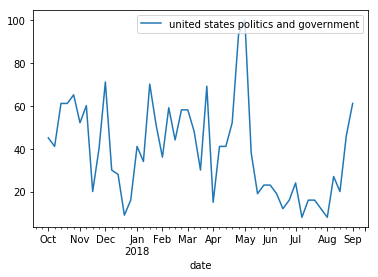

In [140]:
# Show trend line for given trend
lines  =  overtime_interest.plot.line()